# NAME - ANIBBAN DUTTA
# REG NO. - 19BCB0015

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Importing and loading the dataset

In [2]:
df=pd.read_csv("KDDTrain+.txt")
test_df = pd.read_csv("KDDTest+.txt")
df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [3]:
# Assiging column values to the dataset
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack', 'difficulty_level']

df.columns = columns
test_df.columns = columns

In [4]:
print("Training data")
df.head()

Training data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
print("Testing data")
test_df.head()

Testing data


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [6]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
df['attack_flag'] = is_attack
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [7]:
# drop useless columns
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,  35, 36, 37, 38, 39, 40, 41, 42]], axis=1)
df.head()
# create 2D array
XY = df.drop(df.columns[[2]], axis=1)

# Splitting X and y into training and testing sets

In [8]:
# array of 2D array and 1D array
array = [XY.to_numpy(), df.attack_flag.to_numpy()]

# split data
X_train, X_test, y_train, y_test = train_test_split(XY.to_numpy(), df.attack_flag.to_numpy(), 
                                                    test_size=0.2, random_state=42) 

print('data_XY.to_numpy',np.shape(array[0]))
print('X_train',np.shape(X_train))
print('data_df.attack_flag.to_numpy',np.shape(array[1]))
print('y_train',np.shape(y_train))

data_XY.to_numpy (125972, 2)
X_train (100777, 2)
data_df.attack_flag.to_numpy (125972,)
y_train (100777,)


# Performing Feature Scaling

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Applying Multilayer Perceptron Classifier

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Predicting the test set results

In [11]:
predictions = mlp.predict(X_test)
print(predictions)

[1 0 0 ... 0 1 1]


# Evaluating the Algorithm

In [12]:
predictions_train = mlp.predict(X_train)
print('Accuracy Score on Train Data: ',metrics.accuracy_score(predictions_train,y_train))
predictions_test = mlp.predict(X_test)
print('Accuracy Score on Test Data: ',metrics.accuracy_score(predictions_test, y_test))

Accuracy Score on Train Data:  0.8751798525457197
Accuracy Score on Test Data:  0.8735463385592379


# Confusion Matrix

In [13]:
cf=metrics.confusion_matrix(y_test,predictions)
print(cf)

[[12492   894]
 [ 2292  9517]]


Text(0.5, 15.0, 'Predicted')

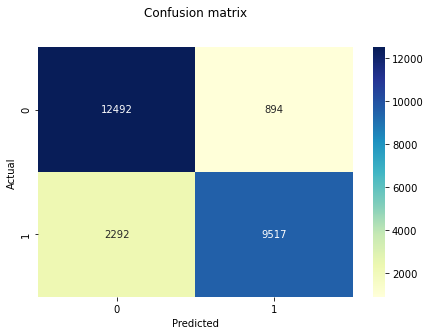

In [14]:
sns.heatmap(pd.DataFrame(cf), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Classification Report

In [15]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89     13386
           1       0.91      0.81      0.86     11809

    accuracy                           0.87     25195
   macro avg       0.88      0.87      0.87     25195
weighted avg       0.88      0.87      0.87     25195

